In [1]:
# подключаем библиотеку
%run libs/pump_unit.ipynb

In [2]:
# файлы с характеристиками насосов
files = ['data/pump.csv',
         'data/pump.csv',
         'data/pump.csv',
         'data/pump.csv']

In [3]:
# шаг изменения параметров при рассчете
flow_step=10.0
head_step=0.2

In [4]:
# первый подъём
pb_1 = PumpBattery(flow_step, head_step, files)
pb_1.calc_units_matrices()

# второй подъём
pb_2 = PumpBattery(flow_step, head_step, files)
pb_2.calc_units_matrices()

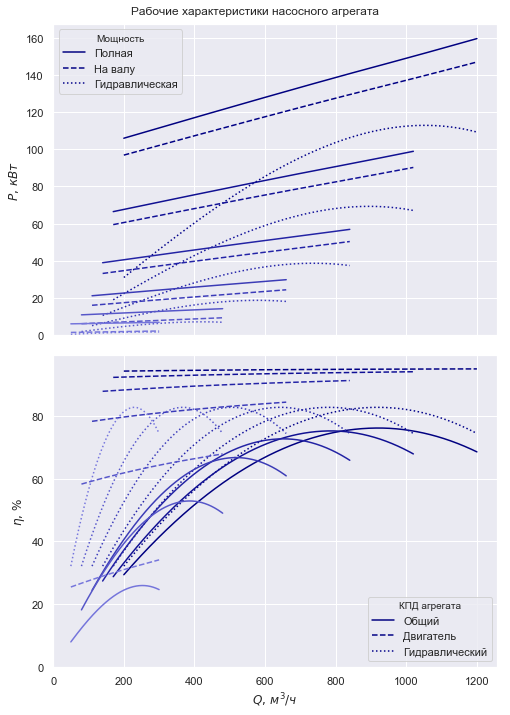

In [5]:
pb_1.units[0].plot_work_curves()

In [6]:
# посчитаем один из вариантов работы
scenario = 0
pb_1.calc_mutation_matrix(scenario)
pb_2.calc_mutation_matrix(scenario)

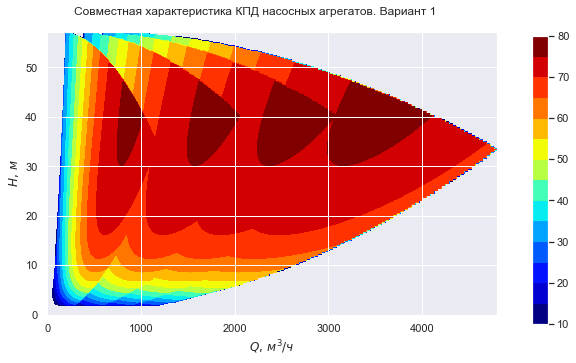

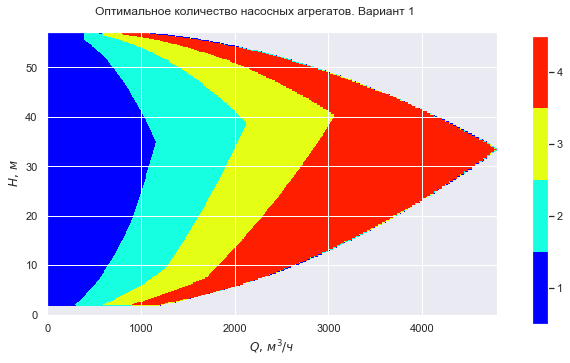

In [7]:
# посмотрим на результат
pb_1.plot_eff_total_map(scenario)
pb_1.plot_count_total_map(scenario)

In [8]:
# работа с данными из файлов

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
#sns.set_palette("bright")

# Use palplot and pass in the variable:
#sns.palplot(palette)

In [10]:
# конвертер величин

def convert_unit(kind, value, unit_in, unit_out):
    unit = {
        'head': {'m':1.0, 'kgf_cm2':10.0, 'bar':10.197, 'kPa':0.10197, 'atm':10.33, 'psi':0.70307},
        'flow': {'cbmh':1.0, 'cbms':3600.0, 'lpm':0.06, 'lps':3.6},
        'power': {'kW':1.0, 'W':0.001}
    }
    return value * unit[kind][unit_in] / unit[kind][unit_out]

In [11]:
# читаем показания

log_1 = pd.read_csv('data/log_06_04_2019.csv', sep=';', decimal=',')
log_1["date"] = pd.to_datetime(log_1["date"], format="%d.%m.%Y %H:%M")
log_1.fillna(method ='ffill', inplace=True)

log_2 = pd.read_csv('data/log_21_04_2019.csv', sep=';', decimal=',')
log_2["date"] = pd.to_datetime(log_2["date"], format="%d.%m.%Y %H:%M")
log_2.fillna(method ='ffill', inplace=True)

In [12]:
# объединяем 2 набора данных для обработки

frames = [log_1, log_2]
log = pd.concat(frames, ignore_index=True)

num = log_1.shape[0]

In [13]:
# преобразуем показания давления

head_cols = ['head in', 'head out', 'head in lift 1', 'head out lift 1', 'head in lift 2', 'head out lift 2']
for col in head_cols:
    log[col] = log[col].apply(lambda x: convert_unit('head', x, 'bar', 'm'))

#### Вспомогательные переменные

In [14]:
freq_cols = ['freq unit 1', 'freq unit 2', 'freq unit 3', 'freq unit 3.1', 
             'freq unit 4', 'freq unit 5', 'freq unit 6', 'freq unit 6.1']
freq_cols_1 = freq_cols[:4]
freq_cols_2 = freq_cols[4:]

In [15]:
speed_cols = ['speed unit 1', 'speed unit 2', 'speed unit 3', 'speed unit 3.1',
              'speed unit 4', 'speed unit 5', 'speed unit 6', 'speed unit 6.1']
speed_cols_1 = speed_cols[:4]
speed_cols_2 = speed_cols[4:]

In [16]:
power_sup_cols = ['power sup. unit 1', 'power sup. unit 2', 'power sup. unit 3', 'power sup. unit 3.1',
                  'power sup. unit 4', 'power sup. unit 5', 'power sup. unit 6', 'power sup. unit 6.1']
power_sup_cols_1 = power_sup_cols[:4]
power_sup_cols_2 = power_sup_cols[4:]

In [17]:
power_hydro_cols = ['power hydro unit 1', 'power hydro unit 2', 'power hydro unit 3', 'power hydro unit 3.1',
                    'power hydro unit 4', 'power hydro unit 5', 'power hydro unit 6', 'power hydro unit 6.1']
power_hydro_cols_1 = power_hydro_cols[:4]
power_hydro_cols_2 = power_hydro_cols[4:]

In [18]:
flow_cols = ['flow unit 1', 'flow unit 2', 'flow unit 3', 'flow unit 3.1',
             'flow unit 4', 'flow unit 5', 'flow unit 6', 'flow unit 6.1']
flow_cols_1 = flow_cols[:4]
flow_cols_2 = flow_cols[4:]

In [19]:
power_rate_cols = ['power rate unit 1', 'power rate unit 2', 'power rate unit 3', 'power rate unit 3.1',
                   'power rate unit 4', 'power rate unit 5', 'power rate unit 6', 'power rate unit 6.1']
power_rate_cols_1 = power_rate_cols[:4]
power_rate_cols_2 = power_rate_cols[4:]

In [20]:
eff_actual_cols = ['eff actual unit 1', 'eff actual unit 2', 'eff actual unit 3', 'eff actual unit 3.1',
                   'eff actual unit 4', 'eff actual unit 5', 'eff actual unit 6', 'eff actual unit 6.1']
eff_actual_cols_1 = eff_actual_cols[:4]
eff_actual_cols_2 = eff_actual_cols[4:]

In [110]:
head_labels = ['Вход в котельную', 'Выход из котельной', 'Всас подъём 1', 'Нагнетание подъём 1',
               'Всас подъём 2', 'Нагнетание подъём 2']

In [113]:
lift_labels = ['Подъём 1', 'Подъём 2']

In [115]:
pump_labels = ['Насос 1', 'Насос 2', 'Насос 3', 'Насос 3.1', 'Насос 4', 'Насос 5', 'Насос 6', 'Насос 6.1']

In [286]:
fact_opt_labels = ['Фактический (подъём 1)', 'Фактический (подъём 2)', 
                   'Оптимальный (подъём 1)', 'Оптимальный (подъём 2)']

In [332]:
def plot_by_date(ncols, dfs, cols, labels, title, y_label):
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 5))
    for ncol in range(ncols):
        ax = axes[ncol] if ncols > 1 else axes
        dfs[ncol].plot('date', cols, title=title, ax=ax, label=labels)
        ax.set_ylabel(y_label)
        ax.legend(loc='upper right')
    
#    log[num:].plot('date', cols, title=title, ax=axes[1], label=labels)
#    axes[1].set_ylabel(y_label)
#    axes[1].legend(loc='upper right')
    plt.show()

In [215]:
def plot_dist_kde(data, ax, color):
    sns.distplot(data, ax=ax, kde=False, color=color)
    second_ax = ax.twinx()
    sns.distplot(data, ax=second_ax, kde=True, hist=False, color=color)
    second_ax.set_yticks([])

In [327]:
def plot_dists(ncols, dfs, cols, labels, title, x_label, y_label, xlim=None):
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 5))
    for ncol in range(ncols):
        ax = axes[ncol] if ncols > 1 else axes
        for col in cols:
            sns.distplot(dfs[ncol][col], ax=ax)
        ax.set_title(title[0])
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xlim(0, xlim)
        ax.legend(labels)
    
    #for col in cols:
#        sns.distplot(log[num:][col], ax=axes[1])
#    axes[1].set_title(title[1])
#    axes[1].set_xlabel(x_label)
#    axes[1].set_ylabel(y_label)
#    axes[1].set_xlim(0, None)
#    axes[1].legend(labels)

In [275]:
def plot_scatter(df, cols, labels, colors, markers, title, x_label, y_label):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    for idx, (col, label) in enumerate(zip(cols, labels)):
        df.plot.scatter(col[0], col[1], color=colors[idx], marker=markers[idx], s=50, ax=axes, label=label)
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_xlim(0, None)
    axes.set_ylim(0, None)
    plt.show()

In [328]:
#def plot_dists(df, cols, labels, colors):
#    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
#    for idx, (col, label) in enumerate(zip(cols, labels)):
#        log[:num].hist(col, density=True, color=colors[idx], ax=axes, alpha=0.5, label=label)
#    axes.set_title(title)
#    axes.set_xlabel(x_label)
#    axes.set_xlim(0, None)
#    plt.legend()
#    plt.show()

#    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

#    for col, color, label in zip(cols, colors, labels):
        #df.hist(col, density=True, color=color, ax=axes, alpha=0.5, label=label)
#        sns.distplot(df[col], bins=2, ax=axes)

#    axes.set_title('Распределение КПД станции (06.04.2019)')
#    axes.set_xlabel('$\eta_T,\, \%$')
#    axes.set_xlim(0, None)
    #plt.legend()
    #plt.show()

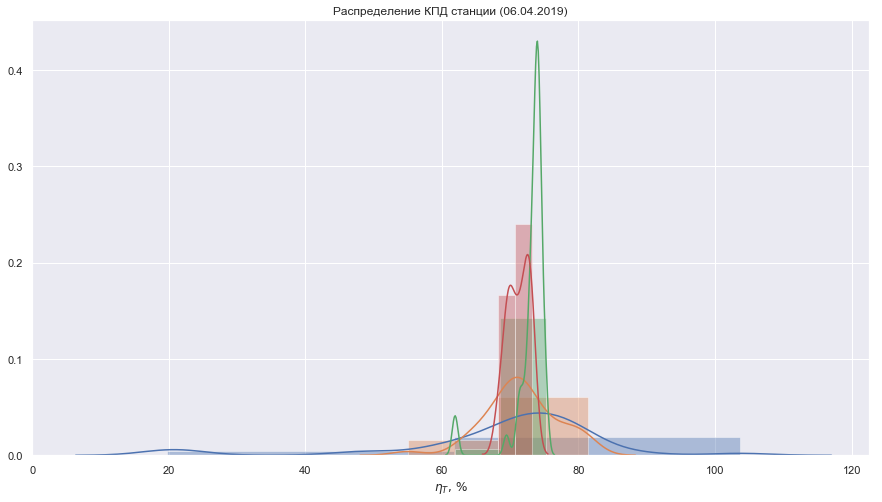

In [305]:
cols = ['eff actual lift 1', 'eff actual lift 2', 'eff opt. lift 1', 'eff opt. lift 2']
plot_dists(log[num:], cols, fact_opt_labels, ['C0', 'C1', 'C0', 'C1'])

#### Расчёты и графики

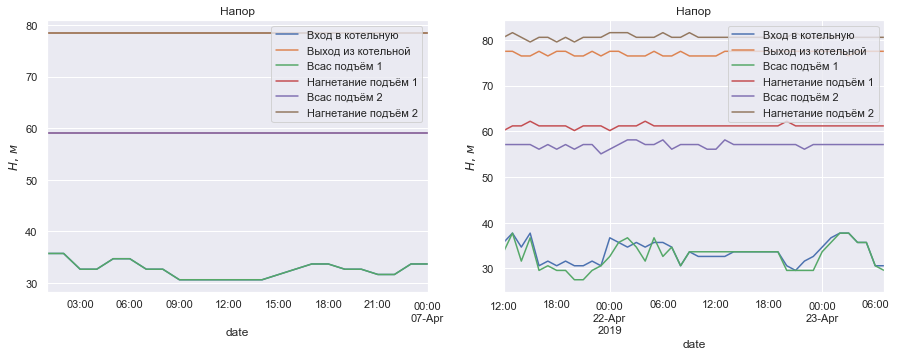

In [333]:
plot_by_date(2, [log[:num], log[num:]], head_cols, head_labels, 'Напор', '$H,\, м$')

In [22]:
# корректировка на высоту установки датчиков

head_in_height = 2.0
head_out_height = 2.0

head_in_N_height = 3.1
head_out_N_height = 3.8

log['head in adj'] = log['head in'] - head_in_height
log['head out adj'] = log['head out'] - head_out_height
log[['head in adj lift 1', 'head in adj lift 2']] = log[['head in lift 1', 'head in lift 2']] - head_in_N_height
log[['head out adj lift 1', 'head out adj lift 2']] = log[['head out lift 1', 'head out lift 2']] - head_out_N_height

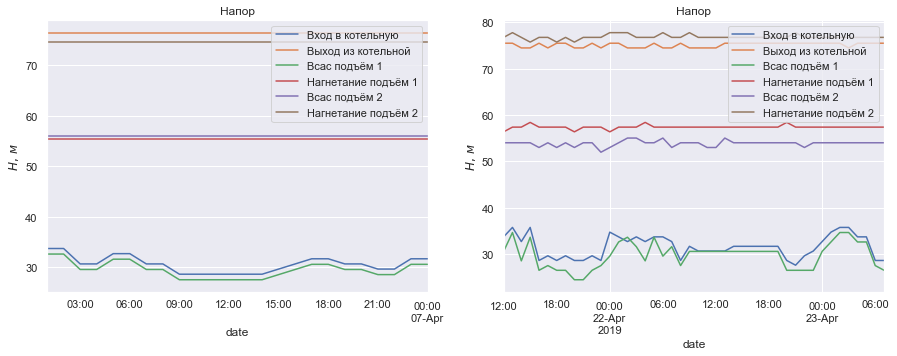

In [334]:
head_adj_cols = ['head in adj', 'head out adj', 'head in adj lift 1', 'head out adj lift 1', 
                 'head in adj lift 2', 'head out adj lift 2']

plot_by_date(2, [log[:num], log[num:]], head_adj_cols, head_labels, 'Напор', '$H,\, м$')

In [24]:
log['head lift 1'] = log['head out adj lift 1'] - log['head in adj lift 1']
log['head lift 2'] = log['head out adj lift 2'] - log['head in adj lift 2']

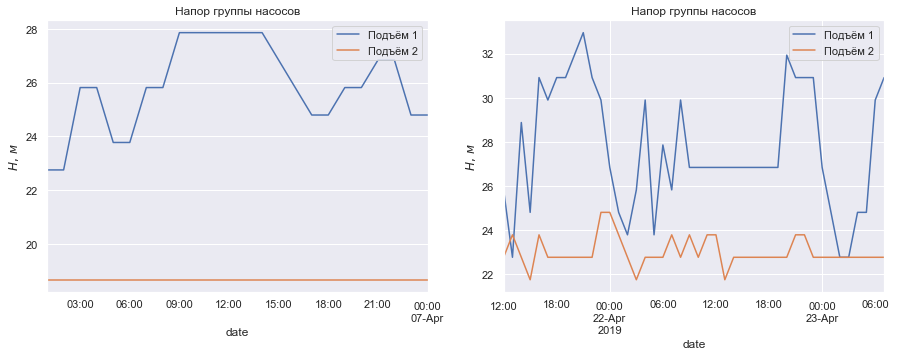

In [335]:
plot_by_date(2, [log[:num], log[num:]], ['head lift 1', 'head lift 2'], lift_labels, 'Напор группы насосов', '$H,\, м$')

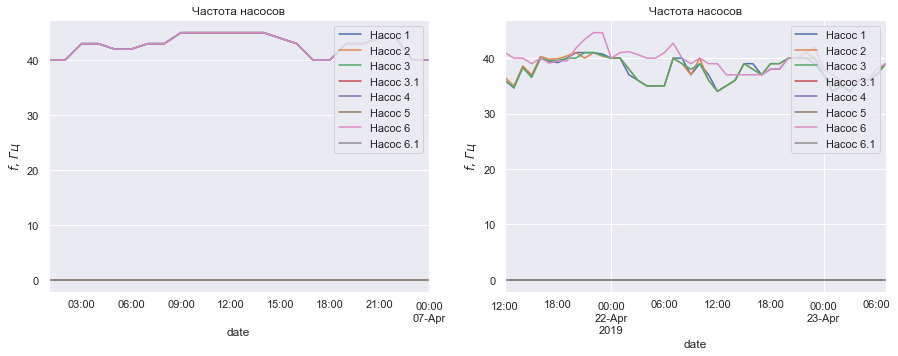

In [336]:
plot_by_date(2, [log[:num], log[num:]], freq_cols, pump_labels, 'Частота насосов', '$f,\, Гц$')

In [27]:
# считаем относительную скорость, нормируем на максимальную частоту

log['speed unit 1'], log['speed unit 2'], log['speed unit 3'], log['speed unit 3.1'] = 0, 0, 0, 0
log['speed unit 4'], log['speed unit 5'], log['speed unit 6'], log['speed unit 6.1'] = 0, 0, 0, 0

for col_1, col_2 in zip(freq_cols, speed_cols):
    log[col_2] = log[col_1] / 50.0

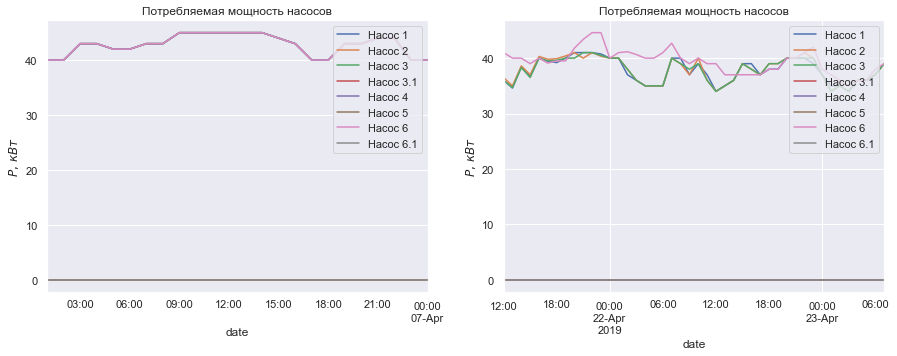

In [337]:
plot_by_date(2, [log[:num], log[num:]], freq_cols, pump_labels, 'Потребляемая мощность насосов', '$P,\, кВт$')

In [29]:
# суммарная мощность насосов

log['power sup. lift 1'] = log[power_sup_cols_1].sum(axis=1)
log['power sup. lift 2'] = log[power_sup_cols_2].sum(axis=1)

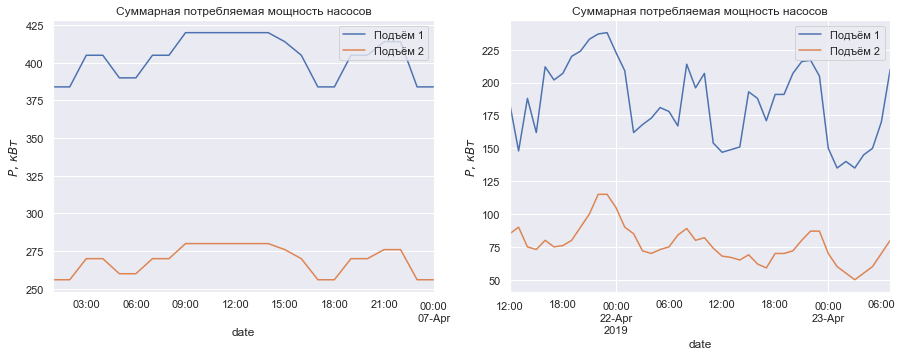

In [338]:
plot_by_date(2, [log[:num], log[num:]], ['power sup. lift 1', 'power sup. lift 2'], lift_labels, 
             'Суммарная потребляемая мощность насосов', '$P,\, кВт$')

In [31]:
# косвенный поиск расхода каждого насоса через напор и частоту

def get_flow_by_head_speed(unit, head, speed):
    unit.pump.set_speed(speed)
    head_lim = head.copy()
    head_lim[head_lim > unit.pump.head_max] = unit.pump.head_max
    data = quadratic_equation_root(unit.pump.head_c[2], 
                                   unit.pump.head_c[1]*speed, 
                                   head_lim - (unit.pump.head_c[0] * speed**2))
    return pd.Series(data, index=head.index)

In [32]:
# косвенный поиск расхода каждого насоса через напор и частоту

log['flow unit 1'], log['flow unit 2'], log['flow unit 3'], log['flow unit 3.1'] = 0, 0, 0, 0
log['flow unit 4'], log['flow unit 5'], log['flow unit 6'], log['flow unit 6.1'] = 0, 0, 0, 0

for idx, (flow, speed) in enumerate(zip(flow_cols_1, speed_cols_1)):
    log[flow] = get_flow_by_head_speed(pb_1.units[idx], log['head lift 1'], log[speed])

for idx, (flow, speed) in enumerate(zip(flow_cols_2, speed_cols_2)):
    log[flow] = get_flow_by_head_speed(pb_2.units[idx], log['head lift 2'], log[speed])

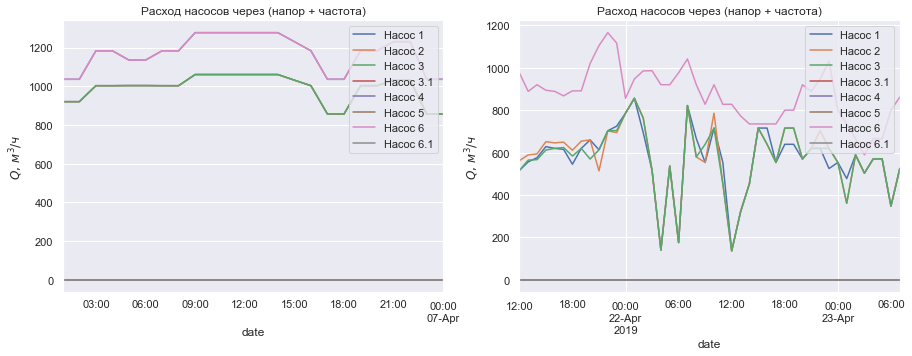

In [339]:
plot_by_date(2, [log[:num], log[num:]], flow_cols, pump_labels, 'Расход насосов через (напор + частота)', '$Q,\, м^3/ч$')

In [34]:
# суммарный расход насосов

log['flow lift 1'] = log[flow_cols_1].sum(axis=1)
log['flow lift 2'] = log[flow_cols_2].sum(axis=1)

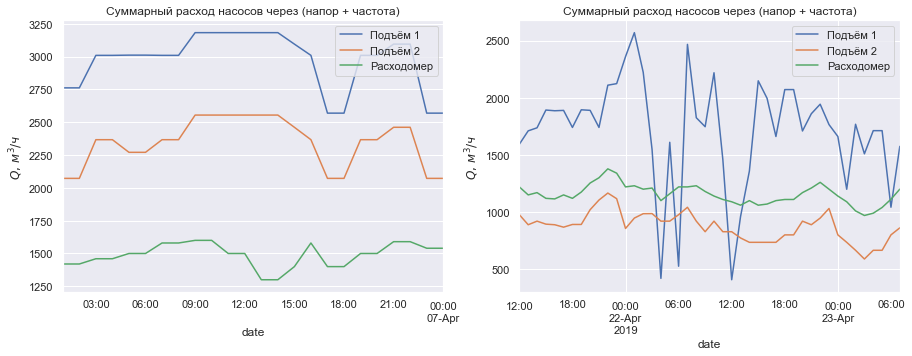

In [340]:
label = lift_labels + ['Расходомер']
plot_by_date(2, [log[:num], log[num:]], ['flow lift 1', 'flow lift 2', 'flow'], label, 
             'Суммарный расход насосов через (напор + частота)', '$Q,\, м^3/ч$')

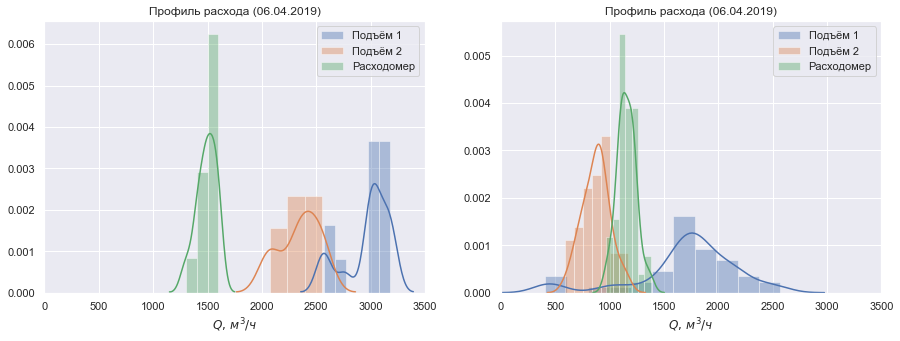

In [326]:
# профиль расхода воды
label = lift_labels + ['Расходомер']
plot_dist_by_date(2, [log[:num], log[num:]], ['flow lift 1', 'flow lift 2', 'flow'], label, 
                  ['Профиль расхода (06.04.2019)', 'Профиль расхода (21.04.2019)'], '$Q,\, м^3/ч$', '', xlim=3500)

In [37]:
log['power hydro unit 1'], log['power hydro unit 2'], log['power hydro unit 3'], log['power hydro unit 3.1'] = 0, 0, 0, 0
log['power hydro unit 4'], log['power hydro unit 5'], log['power hydro unit 6'], log['power hydro unit 6.1'] = 0, 0, 0, 0

In [38]:
# расчёт гидравлической мощности

log[power_hydro_cols] = 998.0 * 9.81 * log[flow_cols] / 3600.0 / 1000.0
log[power_hydro_cols_1] = log[power_hydro_cols_1].mul(log['head lift 1'], axis=0)
log[power_hydro_cols_2] = log[power_hydro_cols_2].mul(log['head lift 2'], axis=0)

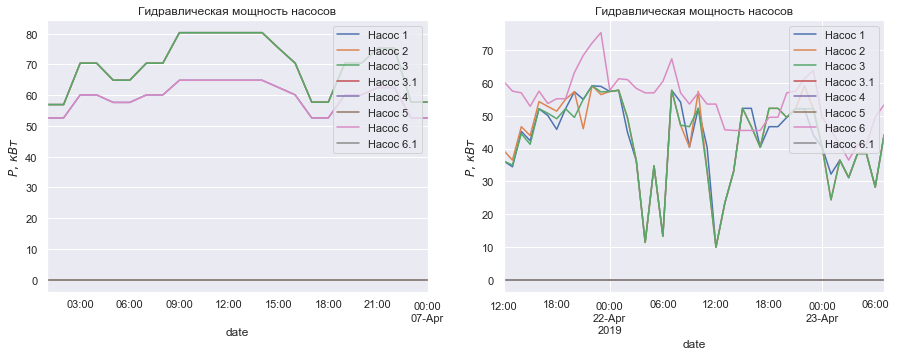

In [341]:
plot_by_date(2, [log[:num], log[num:]], power_hydro_cols, pump_labels, 'Гидравлическая мощность насосов', '$P,\, кВт$')

In [40]:
# суммарная гидравлическая мощность насосов

log['power hydro lift 1'] = log[power_hydro_cols_1].sum(axis=1)
log['power hydro lift 2'] = log[power_hydro_cols_2].sum(axis=1)

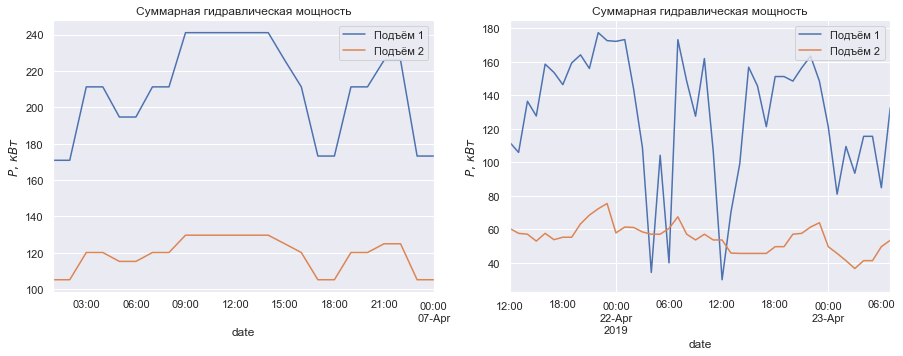

In [342]:
plot_by_date(2, [log[:num], log[num:]], ['power hydro lift 1', 'power hydro lift 2'], lift_labels, 
             'Суммарная гидравлическая мощность', '$P,\, кВт$')

In [42]:
# расчёт удельного расхода электроэнергии

log['power rate lift 1'] = log['power sup. lift 1'] / log['flow lift 1']
log['power rate lift 2'] = log['power sup. lift 2'] / log['flow lift 2']

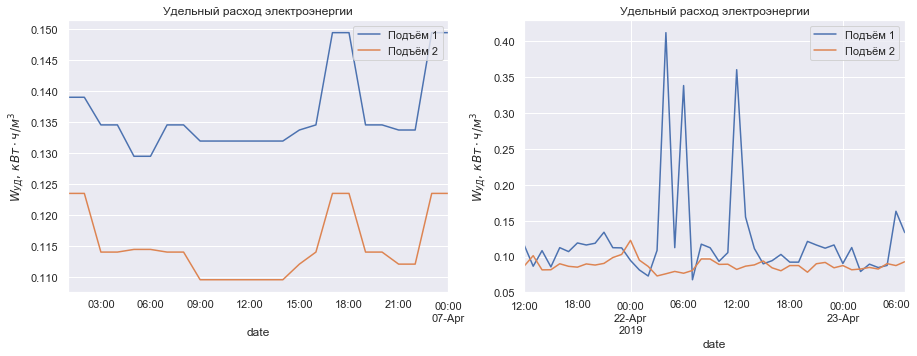

In [343]:
plot_by_date(2, [log[:num], log[num:]], ['power rate lift 1', 'power rate lift 2'], lift_labels,
             'Удельный расход электроэнергии', '$W_{УД},\, кВт \cdot ч/м^3$')

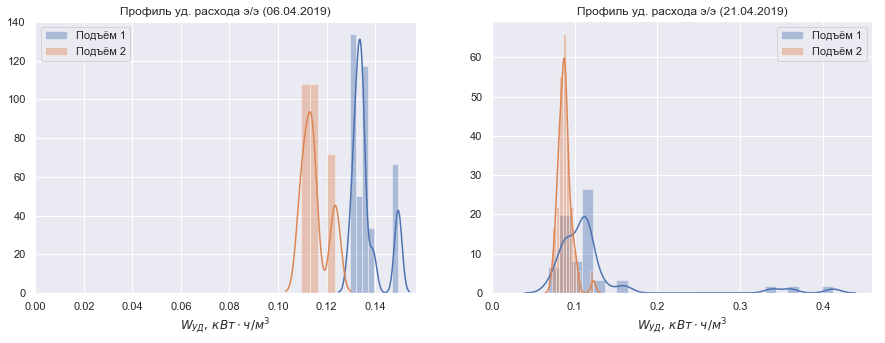

In [310]:
# профиль удельного расхода электроэнергии
plot_dist_by_date(['power rate lift 1', 'power rate lift 2'], lift_labels, 
                  ['Профиль уд. расхода э/э (06.04.2019)', 
                   'Профиль уд. расхода э/э (21.04.2019)'], '$W_{УД},\, кВт \cdot ч/м^3$', '')

In [44]:
# расчёт КПД

log['eff actual lift 1'] = log['power hydro lift 1'] / log['power sup. lift 1'] * 100.0
log['eff actual lift 2'] = log['power hydro lift 2'] / log['power sup. lift 2'] * 100.0

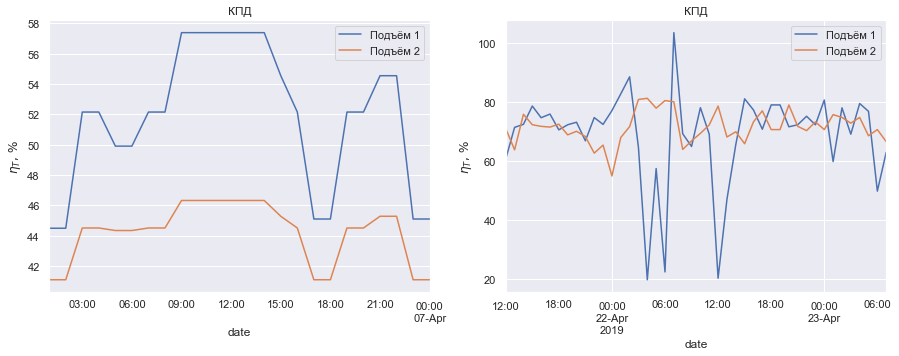

In [344]:
plot_by_date(2, [log[:num], log[num:]], ['eff actual lift 1', 'eff actual lift 2'], lift_labels, 'КПД', '$\eta_T,\, \%$')

In [46]:
# поиск индекса элемента в массиве по значению

def find_index(array, value):
    return (np.abs(np.asarray(array) - value)).argmin()

# поиск ближайшего значения из массива

def find_quant(array, value):
    return array[find_index(array, value)]

In [47]:
# квантование напора по уровням с заданным шагом

log['head idx lift 1'] = log['head lift 1'].apply(lambda x: find_index(pb_1.head_points, x))
log['head idx lift 2'] = log['head lift 2'].apply(lambda x: find_index(pb_2.head_points, x))

log['head quant lift 1'] = pb_1.head_points[log['head idx lift 1']]
log['head quant lift 2'] = pb_2.head_points[log['head idx lift 2']]

In [48]:
# квантование расхода по уровням с заданным шагом

log['flow idx lift 1'] = log['flow lift 1'].apply(lambda x: find_index(pb_1.flow_points, x))
log['flow idx lift 2'] = log['flow lift 2'].apply(lambda x: find_index(pb_2.flow_points, x))

log['flow quant lift 1'] = pb_1.flow_points[log['flow idx lift 1']]
log['flow quant lift 2'] = pb_2.flow_points[log['flow idx lift 2']]

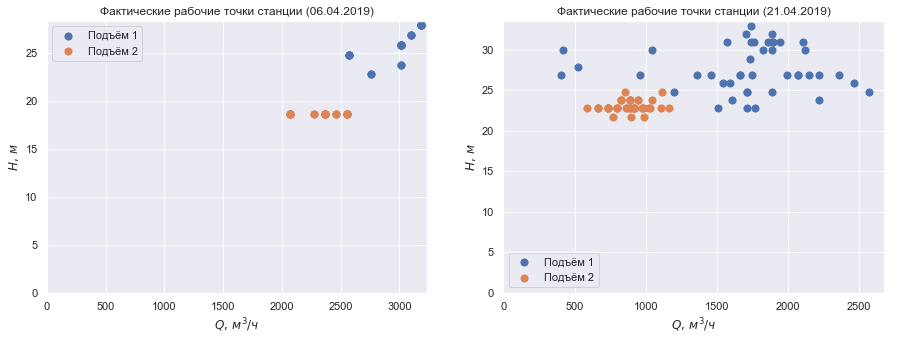

In [237]:
# фактические рабочие точки станции

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

log[:num].plot.scatter('flow lift 1', 'head lift 1', color='C0', ax=axes[0], s=50, label='Подъём 1')
log[:num].plot.scatter('flow lift 2', 'head lift 2', color='C1', ax=axes[0], s=50, label='Подъём 2')
axes[0].set_title('Фактические рабочие точки станции (06.04.2019)')
axes[0].set_xlabel('$Q,\, м^3/ч$')
axes[0].set_ylabel('$H,\, м$')
axes[0].set_xlim(0, None)
axes[0].set_ylim(0, None)

log[num:].plot.scatter('flow lift 1', 'head lift 1', color='C0', ax=axes[1], s=50, label='Подъём 1')
log[num:].plot.scatter('flow lift 2', 'head lift 2', color='C1', ax=axes[1], s=50, label='Подъём 2')
axes[1].set_title('Фактические рабочие точки станции (21.04.2019)')
axes[1].set_xlabel('$Q,\, м^3/ч$')
axes[1].set_ylabel('$H,\, м$')
axes[1].set_xlim(0, None)
axes[1].set_ylim(0, None)

plt.show()

In [50]:
# рекомендуемое количество насосов для рассматриваемых режимов работы станции

log['count opt. lift 1'] = [pb_1.count_total_matrix[scenario]
                                                  [log['head idx lift 1'][x]]
                                                  [log['flow idx lift 1'][x]] for x in range(log['head idx lift 1'].shape[0])]

log['count opt. lift 2'] = [pb_2.count_total_matrix[scenario]
                                                  [log['head idx lift 2'][x]]
                                                  [log['flow idx lift 2'][x]] for x in range(log['head idx lift 2'].shape[0])]

In [51]:
# наилучшее КПД для рассматриваемых режимов работы станции

log['eff opt. lift 1'] = [pb_1.eff_total_matrix[scenario]
                                              [log['head idx lift 1'][x]]
                                              [log['flow idx lift 1'][x]] for x in range(log['head idx lift 1'].shape[0])]

log['eff opt. lift 2'] = [pb_2.eff_total_matrix[scenario]
                                              [log['head idx lift 2'][x]]
                                              [log['flow idx lift 2'][x]] for x in range(log['head idx lift 2'].shape[0])]

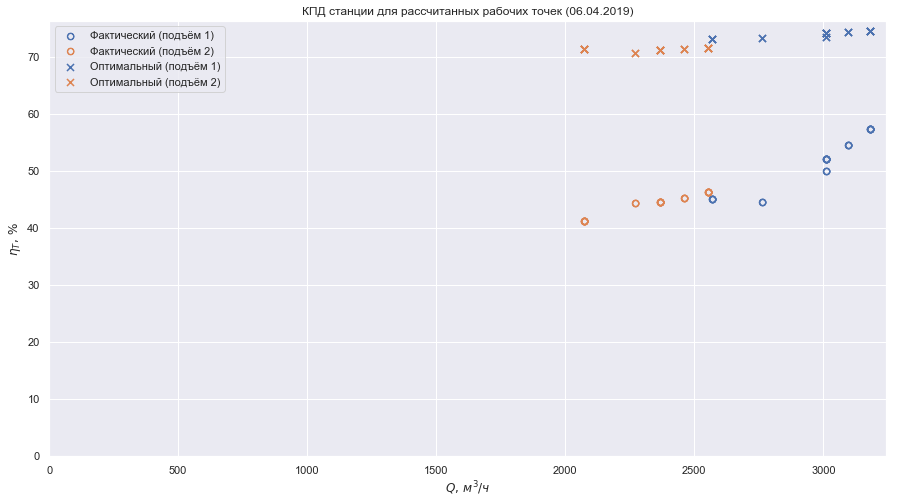

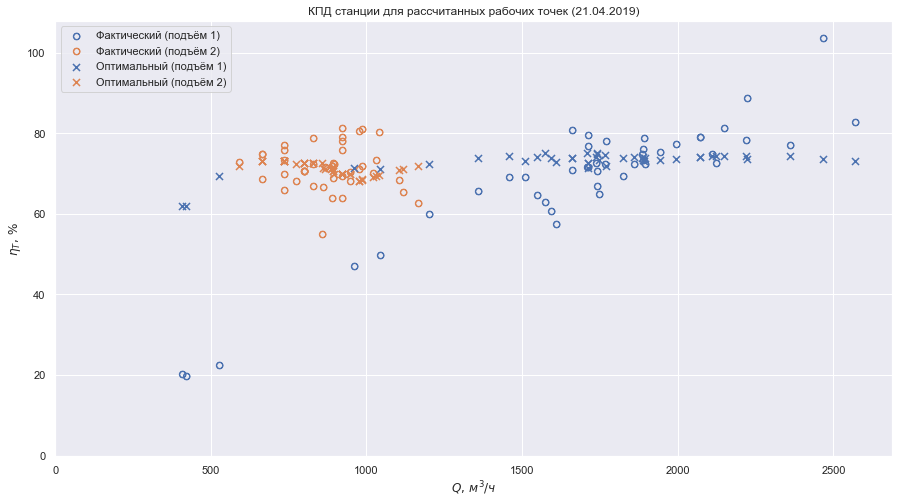

In [289]:
cols = [['flow lift 1', 'eff actual lift 1'], ['flow lift 2', 'eff actual lift 2'],
        ['flow lift 1', 'eff opt. lift 1'], ['flow lift 2', 'eff opt. lift 2']]

plot_scatter(log[:num], cols, fact_opt_labels, ['C0', 'C1', 'C0', 'C1'], ['$\u25EF$', '$\u25EF$', 'x', 'x'], 
             'КПД станции для рассчитанных рабочих точек (06.04.2019)', '$Q,\, м^3/ч$', '$\eta_T,\, \%$')

plot_scatter(log[num:], cols, fact_opt_labels, ['C0', 'C1', 'C0', 'C1'], ['$\u25EF$', '$\u25EF$', 'x', 'x'], 
             'КПД станции для рассчитанных рабочих точек (21.04.2019)', '$Q,\, м^3/ч$', '$\eta_T,\, \%$')

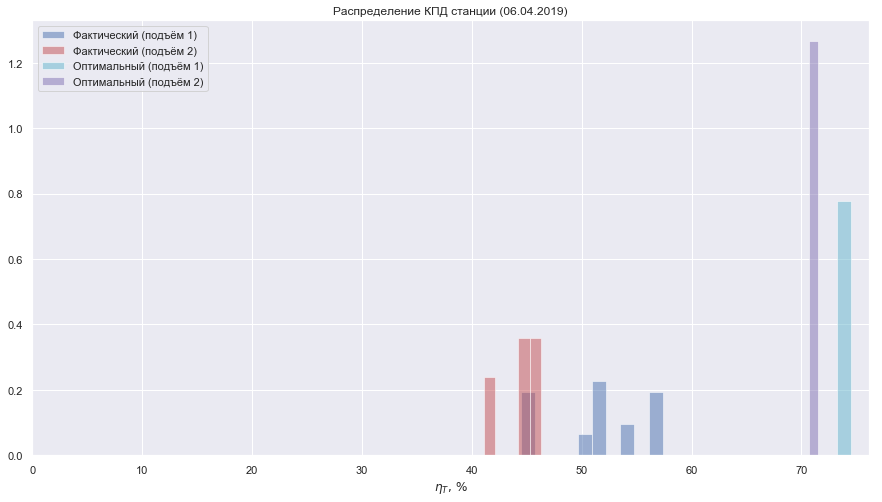

In [76]:
# распределение КПД станции для рассчитанных рабочих точек

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
log[:num].hist('eff actual lift 1', density=True, color='b', ax=axes, alpha=0.5, label='Фактический (подъём 1)')
log[:num].hist('eff actual lift 2', density=True, color='r', bins=5, ax=axes, alpha=0.5, label='Фактический (подъём 2)')
log[:num].hist('eff opt. lift 1', density=True, color='c', bins=1, ax=axes, alpha=0.5, label='Оптимальный (подъём 1)')
log[:num].hist('eff opt. lift 2', density=True, color='m', bins=1, ax=axes, alpha=0.5, label='Оптимальный (подъём 2)')
axes.set_title('Распределение КПД станции (06.04.2019)')
axes.set_xlabel('$\eta_T,\, \%$')
axes.set_xlim(0, None)
plt.legend()
plt.show()

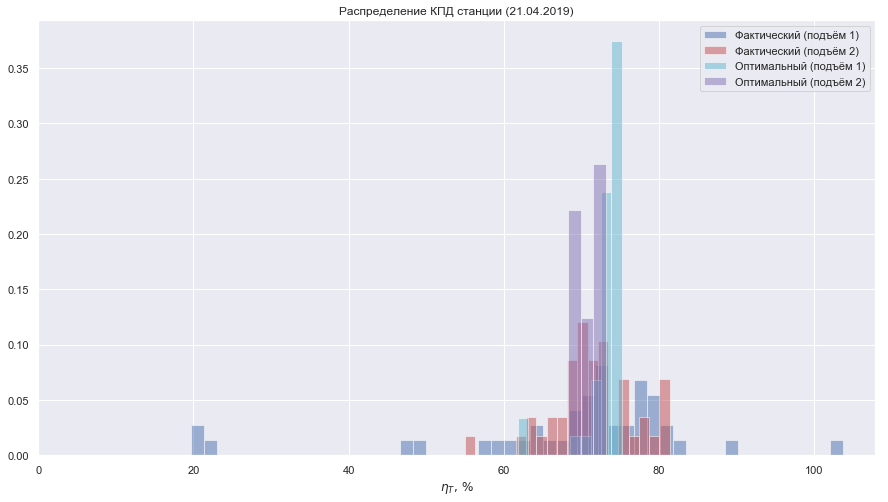

In [77]:
# распределение КПД станции для рассчитанных рабочих точек

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
log[num:].hist('eff actual lift 1', density=True, color='b', bins=50, ax=axes, alpha=0.5, label='Фактический (подъём 1)')
log[num:].hist('eff actual lift 2', density=True, color='r', bins=20, ax=axes, alpha=0.5, label='Фактический (подъём 2)')
log[num:].hist('eff opt. lift 1', density=True, color='c', bins=10, ax=axes, alpha=0.5, label='Оптимальный (подъём 1)')
log[num:].hist('eff opt. lift 2', density=True, color='m', bins=3, ax=axes, alpha=0.5, label='Оптимальный (подъём 2)')
axes.set_title('Распределение КПД станции (21.04.2019)')
axes.set_xlabel('$\eta_T,\, \%$')
axes.set_xlim(0, None)
plt.legend()
plt.show()

In [56]:
# оптимальное энергопотребление

log['power sup. opt. lift 1'] = log['power hydro lift 1'] / log['eff opt. lift 1'] * 100.0
log['power sup. opt. lift 2'] = log['power hydro lift 2'] / log['eff opt. lift 2'] * 100.0

In [57]:
# считаем фактическое и оптимальное количество электроэнергии за период наблюдения

pb_1.energy_1 = log[:num]['power sup. lift 1'].sum()
pb_2.energy_1 = log[:num]['power sup. lift 2'].sum()
pb_1.energy_opt_1 = log[:num]['power sup. opt. lift 1'].sum()
pb_2.energy_opt_1 = log[:num]['power sup. opt. lift 2'].sum()

pb_1.energy_2 = log[num:]['power sup. lift 1'].sum()
pb_2.energy_2 = log[num:]['power sup. lift 2'].sum()
pb_1.energy_opt_2 = log[num:]['power sup. opt. lift 1'].sum()
pb_2.energy_opt_2 = log[num:]['power sup. opt. lift 2'].sum()

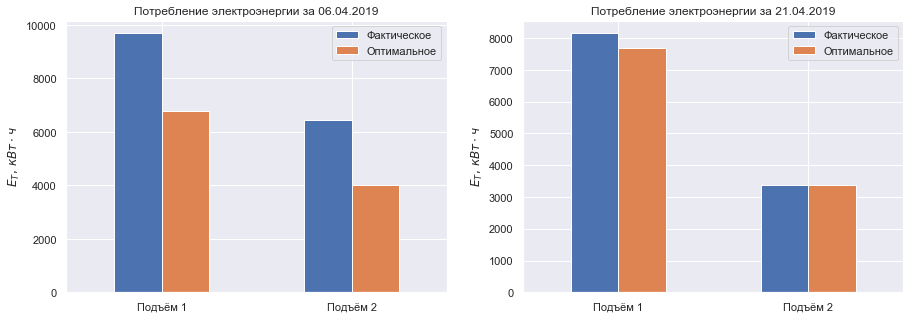

In [58]:
# потребление электроэнергии за рассматриваемый период

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

fact = [pb_1.energy_1, pb_2.energy_1, pb_1.energy_2, pb_2.energy_2]
opt = [pb_1.energy_opt_1, pb_2.energy_opt_1, pb_1.energy_opt_2, pb_2.energy_opt_2]

pd.DataFrame({'fact': fact[:2], 'opt': opt[:2]}, index=lift_labels).plot.bar(rot=0, ax=axes[0])
axes[0].legend(["Фактическое", "Оптимальное"])
axes[0].set_ylabel('$E_{T},\, кВт \cdot ч$')
axes[0].set_title('Потребление электроэнергии за 06.04.2019')

pd.DataFrame({'fact': fact[2:], 'opt': opt[2:]}, index=lift_labels).plot.bar(rot=0, ax=axes[1])
axes[1].legend(["Фактическое", "Оптимальное"])
axes[1].set_ylabel('$E_{T},\, кВт \cdot ч$')
axes[1].set_title('Потребление электроэнергии за 21.04.2019')

plt.show()

In [74]:
# расчёт удельного расхода электроэнергии

log['power rate opt. lift 1'] = log['power sup. opt. lift 1'] / log['flow lift 1']
log['power rate opt. lift 2'] = log['power sup. opt. lift 2'] / log['flow lift 2']

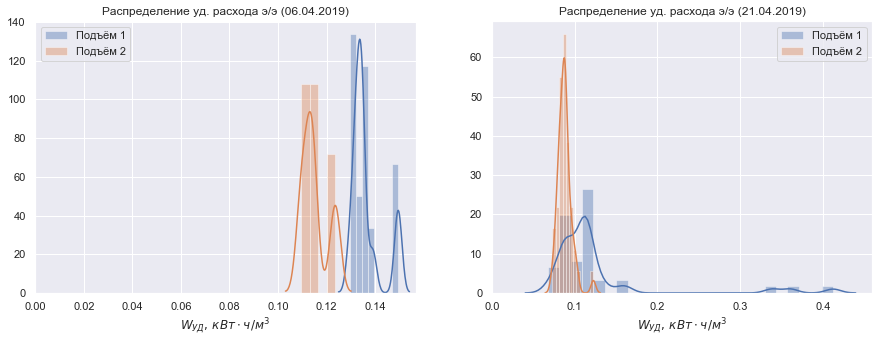

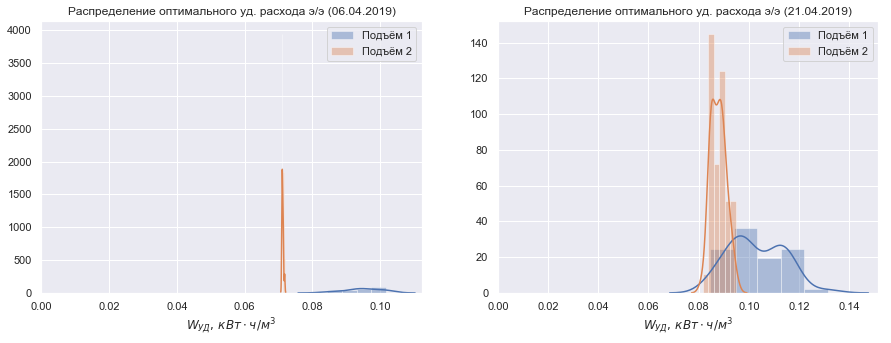

In [309]:
# профиль удельного расхода электроэнергии
plot_dist_by_date(['power rate lift 1', 'power rate lift 2'], lift_labels, 
                  ['Распределение уд. расхода э/э (06.04.2019)', 
                   'Распределение уд. расхода э/э (21.04.2019)'], '$W_{УД},\, кВт \cdot ч/м^3$', '')

# профиль удельного расхода электроэнергии
plot_dist_by_date(['power rate opt. lift 1', 'power rate opt. lift 2'], lift_labels, 
                  ['Распределение оптимального уд. расхода э/э (06.04.2019)', 
                   'Распределение оптимального уд. расхода э/э (21.04.2019)'], '$W_{УД},\, кВт \cdot ч/м^3$', '')